# MNIST-Neural Network-Two Hidden Layers with Modules (and Backward Propagation)

In [1]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import math

sys.path.append(os.pardir)
from common.mnist import *
from common.networks import *

## Multilayer Neural Network Model

In [2]:
data = mnist_data("/Users/yhhan/git/aiclass/0.Professor/data/MNIST_data/.")
(img_train, label_train), (img_validation, label_validation), (img_test, label_test) = data.load_mnist(flatten=True, normalize=True, one_hot_label=True)

input_size=784
hidden_layer1_size=128
hidden_layer2_size=128
output_size=10

network = MultiLayerNet(input_size, 
                        [hidden_layer1_size, hidden_layer2_size], 
                        output_size, 
                        activation='ReLU', 
                        initializer='N2')

## Learning and Validation

In [3]:
import math

num_epochs = 50
train_size = img_train.shape[0]
batch_size = 1000
learning_rate = 0.1

train_error_list = []
validation_error_list = []

test_accuracy_list = []
epoch_list = []

num_batch = math.ceil(train_size / batch_size)

for i in range(num_epochs):
#     batch_mask = np.random.choice(train_size, batch_size)
#     x_batch = img_train[batch_mask]
#     t_batch = label_train[batch_mask]
#     network.learning(learning_rate, x_batch, t_batch)
    for j in range(num_batch):
        x_batch = img_train[j * batch_size : j * batch_size + batch_size]
        t_batch = label_train[j * batch_size : j * batch_size + batch_size]
        network.learning(learning_rate, x_batch, t_batch, optimizer = "SGD")

    epoch_list.append(i)
    
    train_loss = network.loss(x_batch, t_batch)
    train_error_list.append(train_loss)
    
    validation_loss = network.loss(img_validation, label_validation)
    validation_error_list.append(validation_loss)    
    
    test_accuracy = network.accuracy(img_test, label_test)
    test_accuracy_list.append(test_accuracy)       
    
    print("Epoch: {0:5d}, Train Error: {1:7.5f}, Validation Error: {2:7.5f} - Test Accuracy: {3:7.5f}".format(
        i,
        train_loss,
        validation_loss,
        test_accuracy
    ))

Epoch:     0, Train Error: 2.30159, Validation Error: 2.30135 - Test Accuracy: 0.11350
Epoch:     1, Train Error: 2.30027, Validation Error: 2.29988 - Test Accuracy: 0.11350
Epoch:     2, Train Error: 2.29668, Validation Error: 2.29619 - Test Accuracy: 0.11350
Epoch:     3, Train Error: 2.27651, Validation Error: 2.27604 - Test Accuracy: 0.20760
Epoch:     4, Train Error: 2.06732, Validation Error: 2.06964 - Test Accuracy: 0.30380
Epoch:     5, Train Error: 1.42610, Validation Error: 1.41904 - Test Accuracy: 0.57420
Epoch:     6, Train Error: 0.84812, Validation Error: 0.80553 - Test Accuracy: 0.72320
Epoch:     7, Train Error: 0.66876, Validation Error: 0.60909 - Test Accuracy: 0.78780
Epoch:     8, Train Error: 0.58639, Validation Error: 0.52149 - Test Accuracy: 0.81980
Epoch:     9, Train Error: 0.52768, Validation Error: 0.45989 - Test Accuracy: 0.84330
Epoch:    10, Train Error: 0.48782, Validation Error: 0.41548 - Test Accuracy: 0.85910
Epoch:    11, Train Error: 0.46075, Validat

## Analysis with Graph

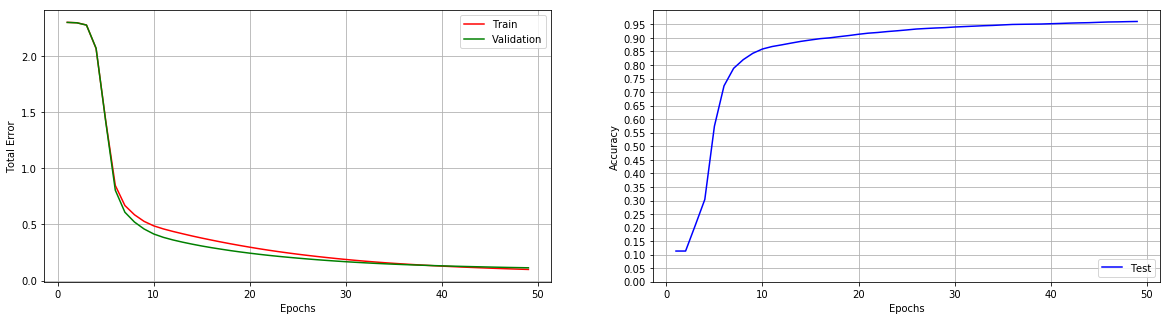

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
Total Test Image: 10000, Number of False Prediction: 393
Test Accuracy: 0.9607
False Prediction Index: 151, Prediction: 8, Ground Truth: 9
False Prediction Index: 233, Prediction: 7, Ground Truth: 8
False Prediction Index: 241, Prediction: 5, Ground Truth: 9
False Prediction Index: 247, Prediction: 6, Ground Truth: 4
False Prediction Index: 259, Prediction: 0, Ground Truth: 6


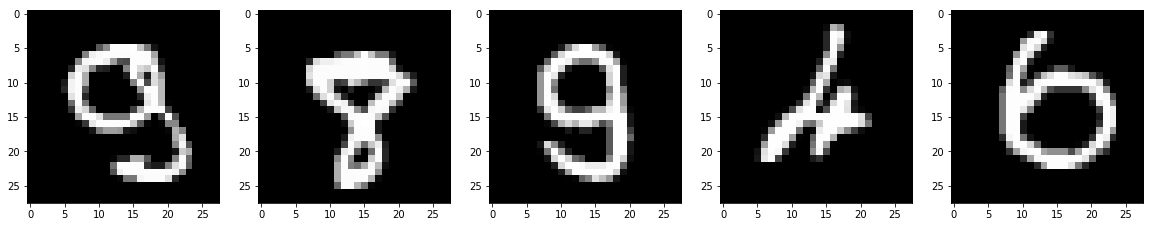

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# Draw Graph about Error Values & Accuracy Values
def draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list):
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list)
    
def draw_false_prediction(diff_index_list):
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(img_test[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
        
prediction = np.argmax(network.predict(img_test), axis=1)
ground_truth = np.argmax(label_test, axis=1)
        
print(prediction)
print(ground_truth)

diff_index_list = []
for i in range(len(img_test)):
    if (prediction[i] != ground_truth[i]):
        diff_index_list.append(i)

print("Total Test Image: {0}, Number of False Prediction: {1}".format(len(img_test), len(diff_index_list)))
print("Test Accuracy:", float(len(img_test) - len(diff_index_list)) / float(len(img_test)))
draw_false_prediction(diff_index_list)